# Hierarchial Clustering Outline
### Using Iris Dataset off Kaggle for Practice

## Obtain

In [50]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#normalize data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#hierarchial clustering libraries
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 

#for creating training and test set
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Scrub

On real scrub I will have to:

- Remove unncessary columns (if any)
- If a categorical column is binary then convert to binary encoding.
- Detect and deal with any missing values in the dataset.
- OHE categorical columns

In [3]:
#set id to index
df = df.set_index(['Id'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [20]:
df.shape

(150, 5)

In [21]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

---

**Normalize Numerical and Categorical Columns**

In [8]:
num_cols = df.select_dtypes('number')
num_cols.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [9]:
x = num_cols.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
num_cols_scaled = pd.DataFrame(x_scaled, index = num_cols.index, 
                              columns = num_cols.columns)
num_cols_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,0.222222,0.625000,0.067797,0.041667
2,0.166667,0.416667,0.067797,0.041667
3,0.111111,0.500000,0.050847,0.041667
4,0.083333,0.458333,0.084746,0.041667
5,0.194444,0.666667,0.067797,0.041667


---

In [10]:
cat_cols = df.select_dtypes('object')
cat_cols.head()

,Species
Id,
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa


In [11]:
cat_cols.nunique()

Species    3
dtype: int64

In [12]:
#OHE
cat_cols_ohe = pd.get_dummies(cat_cols, prefix = 'Species')
cat_cols_ohe.head()

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
Id,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [14]:
df_scaled = pd.merge(num_cols_scaled, cat_cols_ohe, left_index = True,
              right_index = True)
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
Id,,,,,,,
1,0.222222,0.625000,0.067797,0.041667,1,0,0
2,0.166667,0.416667,0.067797,0.041667,1,0,0
3,0.111111,0.500000,0.050847,0.041667,1,0,0
4,0.083333,0.458333,0.084746,0.041667,1,0,0
5,0.194444,0.666667,0.067797,0.041667,1,0,0


## Explore

**Questions:**
1. Do I use categorical columns?
2. Do I normalize before running into model? In real model this is where we will use the functions?

### With Categorical

In [15]:
#select columns
X = df_scaled.values

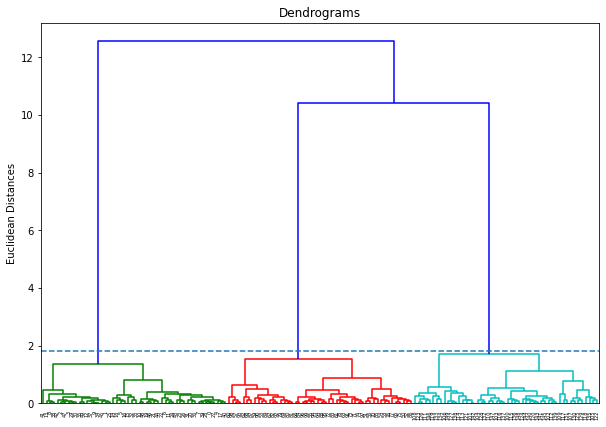

In [16]:
#plot dengrogram
plt.figure(figsize=(10, 7))  
plt.title('Iris Hierarchial Clustering Dendrogram')
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(linestyle='--', y=1.8) 
plt.ylabel('Euclidean Distances')
plt.show()

In [17]:
#clustering
cluster = AgglomerativeClustering(n_clusters = 3, 
                                 affinity = 'euclidean',
                                 linkage = 'ward')
cluster.fit(X)
labels = cluster.labels_

In [18]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Clusters')

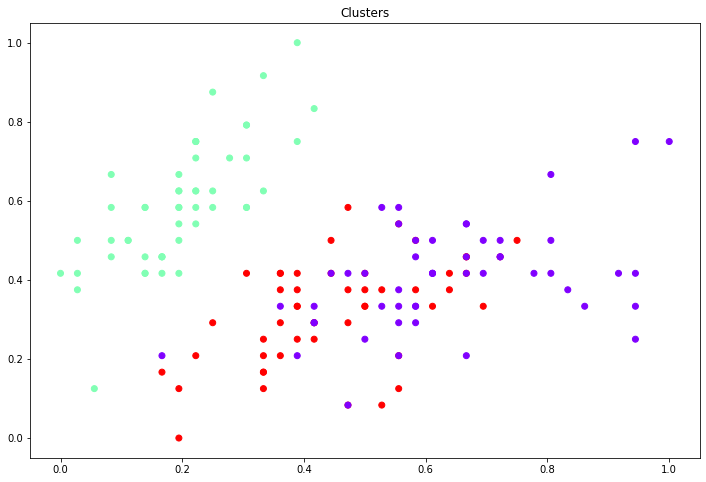

In [19]:
#visualize clusters
plt.figure(figsize = (12,8))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap = 'rainbow')
plt.title('Clusters')

### WITHOUT CATEGORICAL

In [22]:
X = df_scaled.iloc[:, [0,3]].values

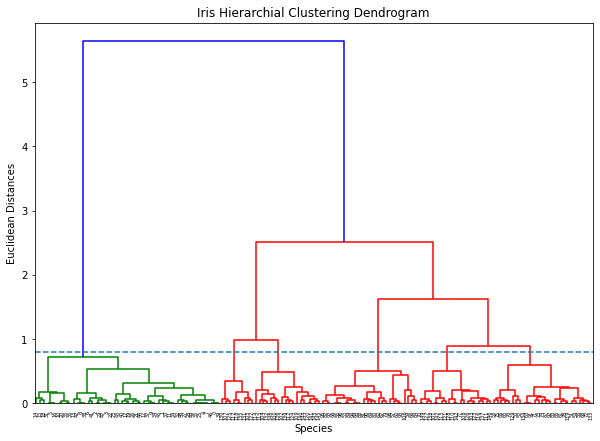

In [25]:
#plot dengrogram
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(linestyle='--', y=.8) 
plt.ylabel('Euclidean Distances')
plt.xlabel('Species')
plt.title('Iris Hierarchial Clustering Dendrogram')

plt.show()

In [26]:
cluster = AgglomerativeClustering(n_clusters = 6, 
                                 affinity = 'euclidean',
                                 linkage = 'ward')
cluster.fit(X)
labels = cluster.labels_

Text(0.5, 1.0, 'Clusters')

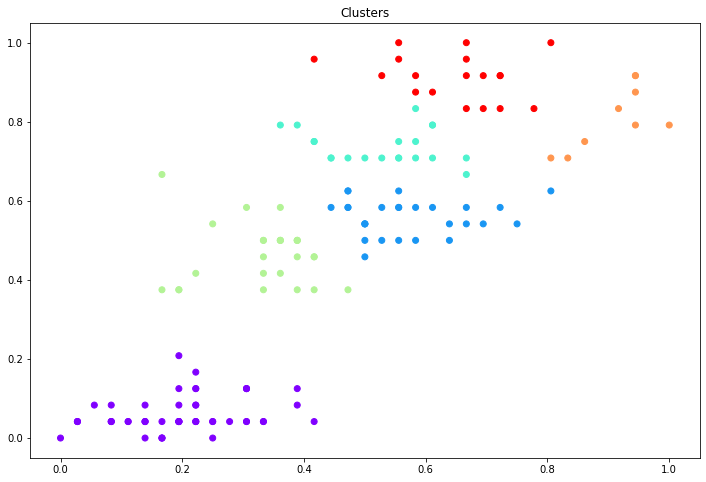

In [27]:
#visualize clusters
plt.figure(figsize = (12,8))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap = 'rainbow')
plt.title('Clusters')